In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [2]:
class Leath:

    def __init__(self,N,p):
        self.N=N
        self.p =1 - p
        pt = (N//2,N//2)
        nn = {(pt[0]+1,pt[1]):True,
              (pt[0]-1,pt[1]):True,
              (pt[0],pt[1]+1):True,
              (pt[0],pt[1]-1):True}
        self.perimeter=nn
        self.cluster = {(N//2,N//2): True}
        self.world = np.zeros((N,N),dtype = np.int8)
        self.perc_flags = [[False,False],[False,False]] #top,bottom,left,right



    def add_perimeter(self,pt):
        """
        Give a point pt (touple)
        add to a perimeter all 4 nearest
        neighbours that are not already in the cluster
        """
        if pt in self.cluster:
            return
        nn = [(pt[0]+1,pt[1]),(pt[0]-1,pt[1]),(pt[0],pt[1]+1),(pt[0],pt[1]-1)]
        for  p in nn:
            # d = np.sqrt((self.N//2-p[0])**2+(self.N//2-p[0])**2)
            if 0 < p[0] < self.N-1 and 0 <= p[1] < self.N-1 :
                if p not in self.cluster and p not in self.perimeter and self.perimeter[pt]:
                    self.perimeter[p] = True

            else:

                if p[0]<0: #left side of map
                    self.perc_flags[0][0]=True

                elif p[0]==self.N-1: #right side of map
                    self.perc_flags[0][1]=True
                if p[1]<0: #top side of map
                    self.perc_flags[1][0]=True
                elif p[1]==self.N-1: #bottom side of map
                    self.perc_flags[1][1]=True

                if all(self.perc_flags[0])or all(self.perc_flags[0]):

                    return False

    def grow_cluster(self):
        new_perim={}
        for p in self.perimeter:
            if self.perimeter[p]:
                new_perim[p]= self.p < np.random.rand()

        for new_pt in new_perim:
            if new_perim[new_pt]:
                if self.add_perimeter(new_pt)  == False:
                    return False
                self.cluster[new_pt]=True
            else:
                self.perimeter[new_pt]=False  #unsure



    def show_board(self):
        try:
            for pt in self.cluster:
                    self.world[pt[0],pt[1]]=10

            for pt in self.perimeter:
                if self.world[pt] < 10:
                    if self.perimeter[pt]:
                        self.world[pt[0],pt[1]]=5
                    else:
                        self.world[pt[0],pt[1]]=-1
        except:
            return


    def update(self):
        if self.grow_cluster() == False:
            return False

        self.show_board()



    def better_then_FuncAnimation(self):

        while True:
            if self.update() == False:
                break
            if all(value == False for value in self.perimeter.values()):
                break

        plt.figure()
        plt.title("P = {}".format(1-self.p))
        plt.imshow(self.world)
        plt.show()

    def make_a_plot(self):
        point_list = []
        for i in  range(self.N):
            for j in  range(self.N):
                if self.world[i][j]==10:
                    point_list.append([i,j,0])
        distance_from_seed = []
        for point in point_list:
            r = np.sqrt((self.N//2-point[0])**2+(self.N//2-point[1])**2)
            if r< self.N//2:
                distance_from_seed.append(r)

        unique, counts = np.unique(self.world, return_counts=True)
        my_dict = (dict(zip(unique, counts)))

        unique= np.unique(sorted(distance_from_seed))


        return sorted(distance_from_seed)[1:],unique, my_dict[10]

In [3]:
def homework_cal(inital_prob,size):
    slopes = []
    for i in range(10):
        while True:
            board = Leath(size,inital_prob)

            board.better_then_FuncAnimation()
            distance,my_bins, count = board.make_a_plot()
            x,y = np.histogram(distance,bins=my_bins)

            if len(x)<3:
                continue

            my_sum =1
            M=[0]*(len(x))
            for j in range(len(x)):
                my_sum +=x[j]
                M[j]=my_sum




            linreg = linregress(np.log(y[1:]),np.log(M[:]))
            slopes.append( linreg[0])
            break
    return np.log(y[2:]),np.log(M[1:]),np.mean(slopes)

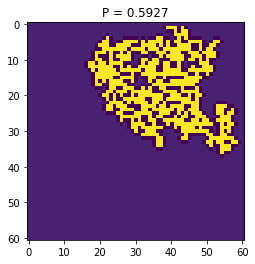

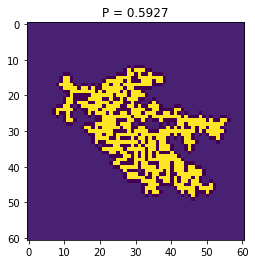

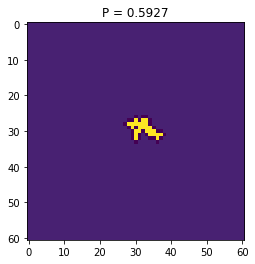

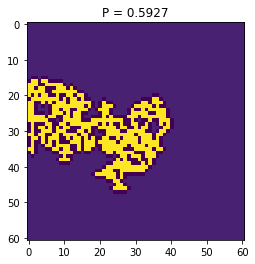

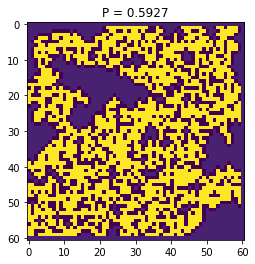

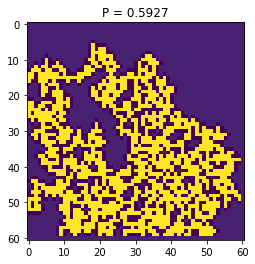

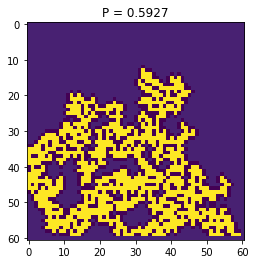

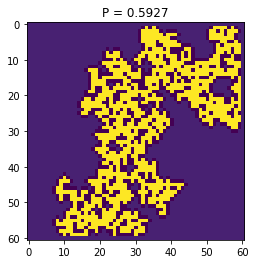

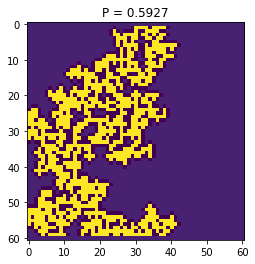

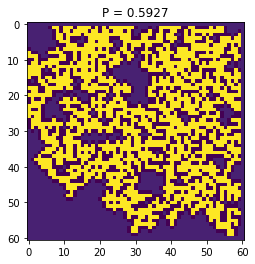

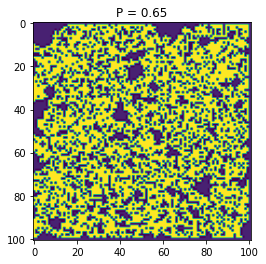

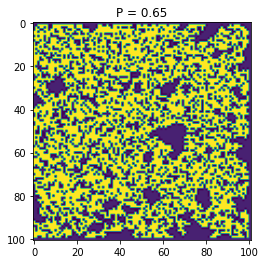

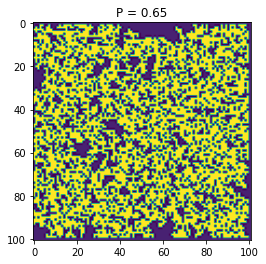

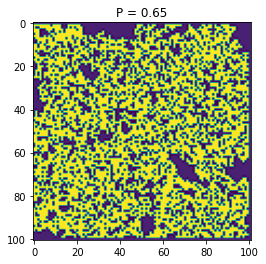

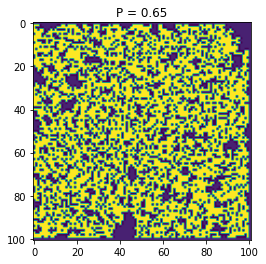

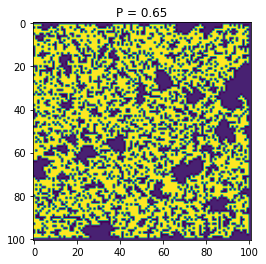

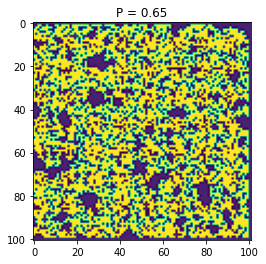

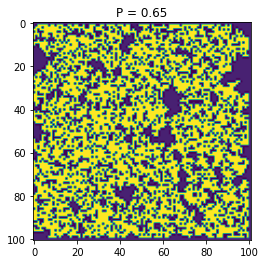

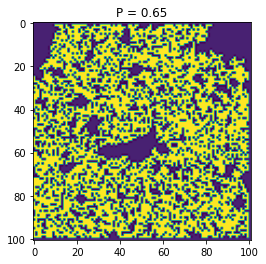

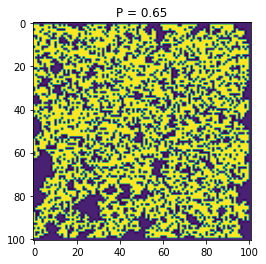

In [4]:

prob1 = 0.5927
size1 = 61
x1,y1,d1 = homework_cal(prob1,size1)



prob2 = 0.65
size2 = 101
x2,y2,d2 = homework_cal(prob2,size2)



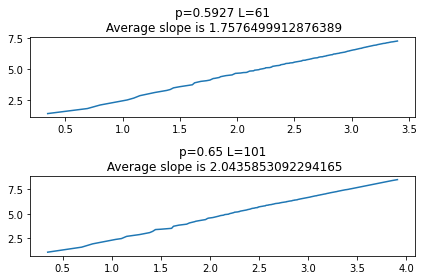

In [5]:
fig, axs = plt.subplots(2)

axs[0].set_title("p={} L={}\n Average slope is {}".format(prob1,size1,d1))
axs[0].plot(x1,y1)

axs[1].set_title("p={} L={}\n Average slope is {}".format(prob2,size2,d2))
axs[1].plot(x2,y2)

plt.tight_layout()
plt.show()

#### Is the slope approximately equal to the value of D found in part (1)?
 - No

#### Does the slope increase or decrease for larger r?
 -  if we remove the small values for r and values for when r is larger than 1/2 the size of the canvas assuming the
 seed is placed in the center of the canvas the slope does not seem to change.

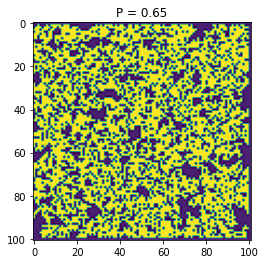

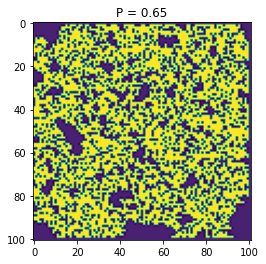

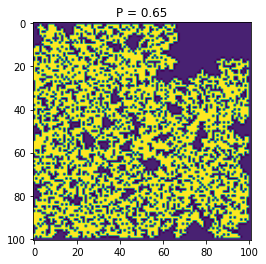

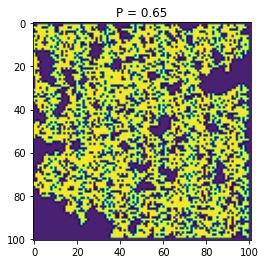

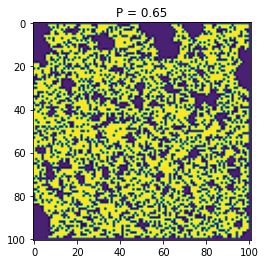

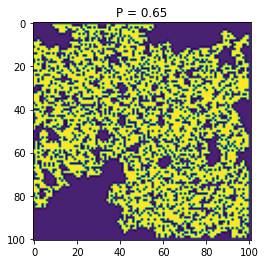

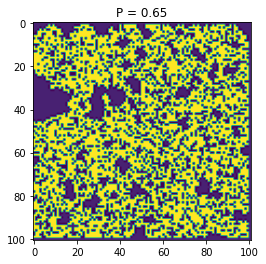

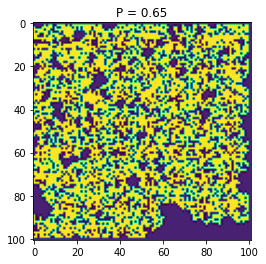

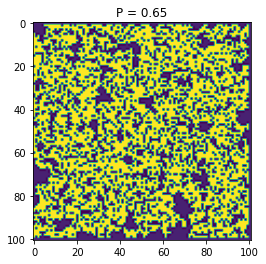

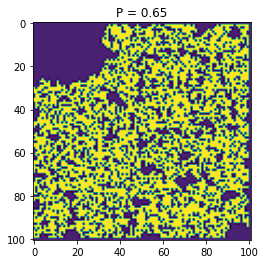

In [6]:
prob3 = 0.80
size3 = 101
x3,y3,d3 = homework_cal(prob2,size2)

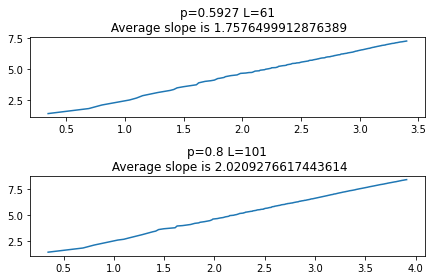

In [7]:
fig, axs = plt.subplots(2)

axs[0].set_title("p={} L={}\n Average slope is {}".format(prob1,size1,d1))
axs[0].plot(x1,y1)

axs[1].set_title("p={} L={}\n Average slope is {}".format(prob3,size3,d3))
axs[1].plot(x3,y3)

plt.tight_layout()
plt.show()

#### Repeat for p = 0.80. Is a spanning cluster generated at p > p_c a fractal?
- I do not think this is a cluster